In [23]:
import networkx as nx
import pydent

In [151]:
ls /Users/justinvrana/Documents/GitHub/Terrarium/tests/test_extras


events.json       test_timeline.py  timeline.gexf


In [156]:
import json

with open('/Users/justinvrana/Documents/GitHub/Terrarium/tests/test_extras/events.json', 'r') as f:
    events = json.load(f)


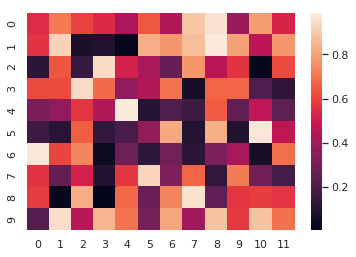

In [157]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

Data associated to Item
Data associated to Operation
Data associated to Plan
Item created
Item deleted
Operation completed
Operation created
Operation errored
Plan was created
Protocol job created
Protocol job finished
User change operation status


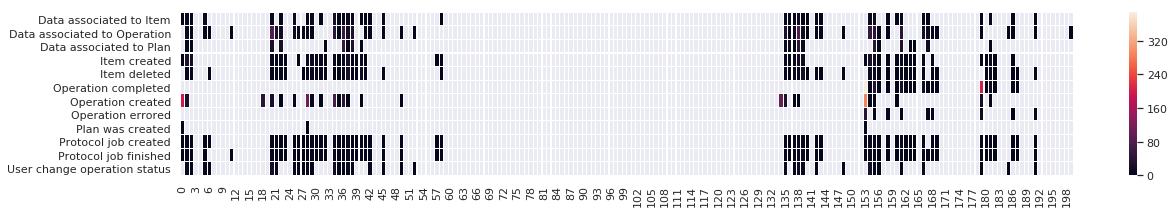

In [300]:
import json
import numpy as np
import seaborn as sns
import pylab as plt

with open('/Users/justinvrana/Documents/GitHub/Terrarium/tests/test_extras/events.json', 'r') as f:
    events = json.load(f)

# start when plan started
filtered = {}
start_time = min(events['Plan was created'])
for k, v in events.items():
    for _v in v:
        if _v >= start_time:
            filtered.setdefault(k, []).append(_v)
events = filtered
    
# init matrix
num_events = len(list(events.keys()))
num_bins = 200
_alltimestamps = list(flatten(v for v in events.values()))
mn = min(_alltimestamps)
mx = max(_alltimestamps)
bins = np.linspace(mn, mx, num_bins)
X = np.zeros((num_events, num_bins))

# key unique events
event_keys = sorted(list(events.keys()))

for i, k in enumerate(event_keys):
    print(k)
    for _x in np.digitize(events[k], bins):
        X[i][_x-1] += 1

# Plot Figure
xfiltered = X[:, :]
fig = plt.figure(figsize=(20, 3))
ax = fig.gca()
sns.heatmap(xfiltered, ax=ax, square=False, linewidths=0.1, mask=np.where(xfiltered == 0, True, False), yticklabels=event_keys)
plt.savefig('planevents.svg', format='svg')

In [247]:
xfiltered = X[100:, :]
xfiltered

array([], shape=(0, 300), dtype=float64)

In [235]:
da.raw

{'id': 528523,
 'parent_id': 34052,
 'parent_class': 'Plan',
 'key': 'precondition_warnings',
 'upload_id': None,
 'object': '{"precondition_warnings":""}',
 'created_at': '2019-06-22T08:53:21.000-07:00',
 'updated_at': '2019-06-22T08:53:21.000-07:00'}

In [24]:
local = pydent.login('vrana', 'http://0.0.0.0')

 ·········


In [26]:
local.using_cache = True
local.set_timeout(60)

In [98]:
ops = local.Operation.where('status != "planning"')

In [100]:
errored = local.Operation.where({'status': 'error'})

In [101]:
done = local.Operation.where({'status': 'done'})

In [102]:
print("Done: " + str(len(done)))
print("Errored: " + str(len(errored)))
print("Total: " + str(len(ops)))

Done: 70951
Errored: 14618
Total: 90074


In [310]:
ots = local.OperationType.where({'deployed': True})
print(len(ots))

258


In [308]:
ots = _



In [309]:
print(len(ots))

TypeError: object of type 'numpy.float64' has no len()

In [141]:
local.DataAssociation.where({'value': 'Status changed to pending on 2019-04-17 by Eriberto Lopez'})

[]

In [149]:
local.Job.one()

In [150]:
j = _
j.raw

{'id': 99458,
 'user_id': None,
 'arguments': {'operation_type_id': 623},
 'state': '[{"operation":"initialize","arguments":{"operation_type_id":623},"time":"2019-05-21T16:07:32.176+00:00"}]',
 'created_at': '2019-05-21T09:07:32.000-07:00',
 'updated_at': '2019-05-21T09:07:32.000-07:00',
 'path': 'operation.rb',
 'pc': -1,
 'group_id': 55,
 'submitted_by': 227,
 'desired_start_time': '2019-05-21T09:07:32.000-07:00',
 'latest_start_time': '2019-05-21T10:07:32.000-07:00',
 'metacol_id': None,
 'successor_id': None}

In [147]:
list(str(da.key) for da in das if 'status' in da.key)

['precondition_status',
 'precondition_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'plate_status',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'status_change',
 'stat

In [ ]:
from more_itertools import flatten
running_plans = flatten([op.plans for op in ops])
print(len(running_plans))

In [43]:
with local(using_cache=False) as sess:
    plans = sess.Plan.where("status != 'planning'")


In [64]:
plans = sorted(plans, key=lambda p: len(p.wires), reverse=True)

sess = local.with_cache(timeout=60)
with sess.with_cache() as s:
    myplans = plans[:1]
    s.browser.update_cache(myplans)
    s.browser.get("Plan", ["operations", "data_associations"])
    s.browser.get("Wire", ["source", "destination"])
    s.browser.get("Operation", ["field_values", "operation_type", "data_associations", "jobs"])
    s.browser.get("FieldValue", {"field_type": "allowable_field_types", "item": []})
    s.browser.get("Item", "data_associations")
    s.browser.get("AllowableFieldType", "field_type")

In [68]:
g = nx.DiGraph()

def node_id(model):
    return "{}__{}".format(model.__class__.__name__, model._primary_key)

def add_node(g, model):
    g.add_node(node_id(model), __data__=model.dump(), created_at=model.created_at)

def add_edge(g, m1, m2):
    g.add_edge(node_id(m1), node_id(m2))
    
for w in sess.browser.get('Wire'):
    add_node(g, w.source)
    add_node(g, w.destination)
    add_edge(g, w.source, w.destination)

In [72]:
import arrow

s = local.Sample.one()

t = arrow.get(s.updated_at)

In [81]:
t.timestamp / 1.0 / 60.0 / 60.0 / 24.0 / 365

49.50594212962963

In [85]:
arrow.now().timestamp

1561235893

In [95]:
production = pydent.AqSession('vrana', 'Mountain5', 'http://0.0.0.0')
production.set_timeout(60)
plans = production.Plan.where("status != 'planning'")

In [96]:
len(plans)

355

In [97]:
ops = production.Operation.where('status != "planning"')

KeyboardInterrupt: 